This problem was adapted from Professor Farimani's paper. If you are interested in learning more, you can read it <a href="https://www.nature.com/articles/s41699-018-0060-8.pdf">here</a>.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# (a)
# data preprocessing

data = pd.read_csv("data.csv", header = None)
#print(amino_acids)
acids_labels = [i for i in np.array(data)[0] if str(i) != 'nan']
acids_examples = np.array(data)[1:]

examples = []
for j in range(len(acids_labels)):
    for i in range(np.array(data).shape[0] - 1):
        examples.append([acids_examples[i][(j * 2) + col_i] for col_i in range(2)])
labels = [j for j in range(len(acids_labels)) for x in range(np.array(data).shape[0] - 1)]
print(f"Shape of Examples: {np.shape(examples)}")
print(f"Shape of Labels: {np.shape(labels)}")
examples = np.array(examples).astype(float)
labels = np.array(labels).astype(float)

X_train, X_test, y_train, y_test = train_test_split(examples, labels, test_size=0.30, )

Shape of Examples: (2000, 2)
Shape of Labels: (2000,)


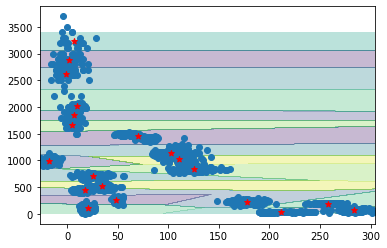

In [2]:
# (b)
# k-means
kmeans = KMeans(n_clusters = 20, random_state = 0).fit(X_train)
centroids = np.array(kmeans.cluster_centers_)
plt.scatter(examples[:, 0], examples[:, 1])
X_train_min = X_train[:, 0].min() - 1
X_train_max = X_train[:, 0].max() + 1
y_train_min = X_train[:, 1].min() - 1
y_train_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(X_train_min, X_train_max), np.arange(y_train_min, y_train_max))
predicted = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, predicted, alpha=0.3, zorder=0)
plt.scatter(centroids[:,0], centroids[:,1], marker="*", c="r")

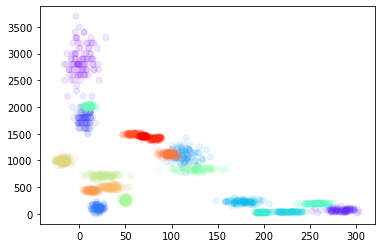

In [3]:
plt.scatter(examples[:, 0], examples[:, 1], c=labels, cmap="rainbow", zorder=1, alpha=0.1)


Accuracy: 0.992


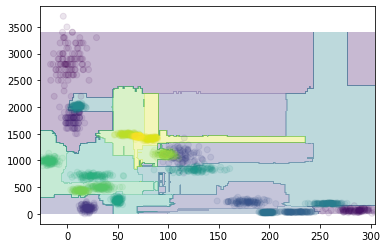

In [4]:
# (c)
# random forest
randomForest = RandomForestClassifier().fit(X_train, y_train)
X_train_min = X_train[:, 0].min() - 1
X_train_max = X_train[:, 0].max() + 1
y_train_min = X_train[:, 1].min() - 1
y_train_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(X_train_min, X_train_max), np.arange(y_train_min, y_train_max))
predicted = randomForest.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, predicted, alpha=0.3, zorder=0)
plt.scatter(examples[:, 0], examples[:, 1], c=labels, zorder=1, alpha=0.1)
print(f"Accuracy: {randomForest.score(examples, labels)}")

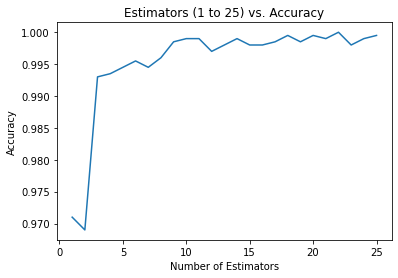

In [5]:
acc = []
estimate_arr = range(1, 25 + 1)
for i in estimate_arr:
    model = RandomForestClassifier(n_estimators = i).fit(examples, labels)
    acc.append(model.score(examples, labels))

plt.plot(estimate_arr, acc)
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Estimators (1 to 25) vs. Accuracy")
plt.show()

In [6]:
# (d)
# Analysis

In terms of the different ML algorithms that were applied, I noticed that the decision boundary shapes seemed much more better from random forest over the entire data even though it only used training data. Along with that, it seemed to fit the data better in the y direction compared to the KMeans method. The accuracy seemed to be very close to 100% with the random forest method as the number of estimators increased too.